# Text Extraction From Aadhar Card Image (Indian Identity Card)

### Steps
* 1. Image Preprocessing.
* 2. Apply OCR t extract raw text from image.
* 3. Apply reguler expressions to extract relvent data from raw text.
* 4. Display the raw text.

In [2]:
import cv2
import pytesseract
import re

pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

class Aadhar_OCR:
    def __init__(self, img_path):
        self.user_aadhar_no = str()
        self.user_gender = str()
        self.user_dob = str()
        self.user_name = str()

        self.img_name = img_path
    
    def extract_data(self):
        img = cv2.imread(self.img_name)
        resized_image = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        _, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        #invert
        inverted_image = cv2.bitwise_not(thresholded_image)
        text = pytesseract.image_to_string(thresholded_image)
        print(text)

        all_text_list = re.split(r'[\n]', text) 
        #text process
        text_list = list()
        for i in all_text_list:
            if re.match(r'^(\s)+$', i) or i == '':
                continue
            else:
                text_list.append(i)

                
                
        aadhar_no_pat = r'^[0-9]{4}\s[0-9]{4}\s[0-9]{4}$'
        for i in text_list:
            if re.match(aadhar_no_pat, i):
                self.user_aadhar_no = i
            else:
                continue

        
        gender_pat = r'\b(male|female|MALE|FEAMALE|Male|Feamale)\b'
        for i in text_list:
            match = re.search(gender_pat, i, re.IGNORECASE)
            if match:
                self.user_gender = match.group(0).upper()
                break

        
        aadhar_dob_pat = r'(Year|Birth|irth|YoB|YOB:|DOB:|DOB)'
        date_ele = str()
        index = -1  
        dob_idx = -1  
        for idx, i in enumerate(text_list):
            if re.search(aadhar_dob_pat, i):
                index = re.search(aadhar_dob_pat, i).span()[1]
                date_ele = i
                dob_idx = idx
            else:
                continue

        date_str = ''
        for i in date_ele[index:]:
            if re.match(r'\d', i):
                date_str = date_str + i
            elif re.match(r'/', i):
                date_str = date_str + i
            else:
                continue
        self.user_dob = date_str

        self.user_name = text_list[dob_idx - 1]
        
        return [self.user_aadhar_no, self.user_gender, self.user_dob, self.user_name]
        
    
# Here input the path to the aadhar card image
ocr = Aadhar_OCR(r"C:\Users\varun\project_folder\Aadhar_data\Front\10.jpg")

extracted_data = ocr.extract_data()


aadhar_no, gender, dob, name = extracted_data
print("Aadhar Card No:", aadhar_no)
print("Gender:", gender)
print("Date of Birth:", dob)
print("Name:", name)


Riyasat
wy fefet/ DOB: 01/01/1991
gee / MALE

6754 3973 8680


Aadhar Card No: 6754 3973 8680
Gender: MALE
Date of Birth: 01/01/1991
Name: Riyasat


### Above results show that Relevent details like Aadhar Number, Gender, D.O.B and Name are succesfully extracted from the image of Aadhar card

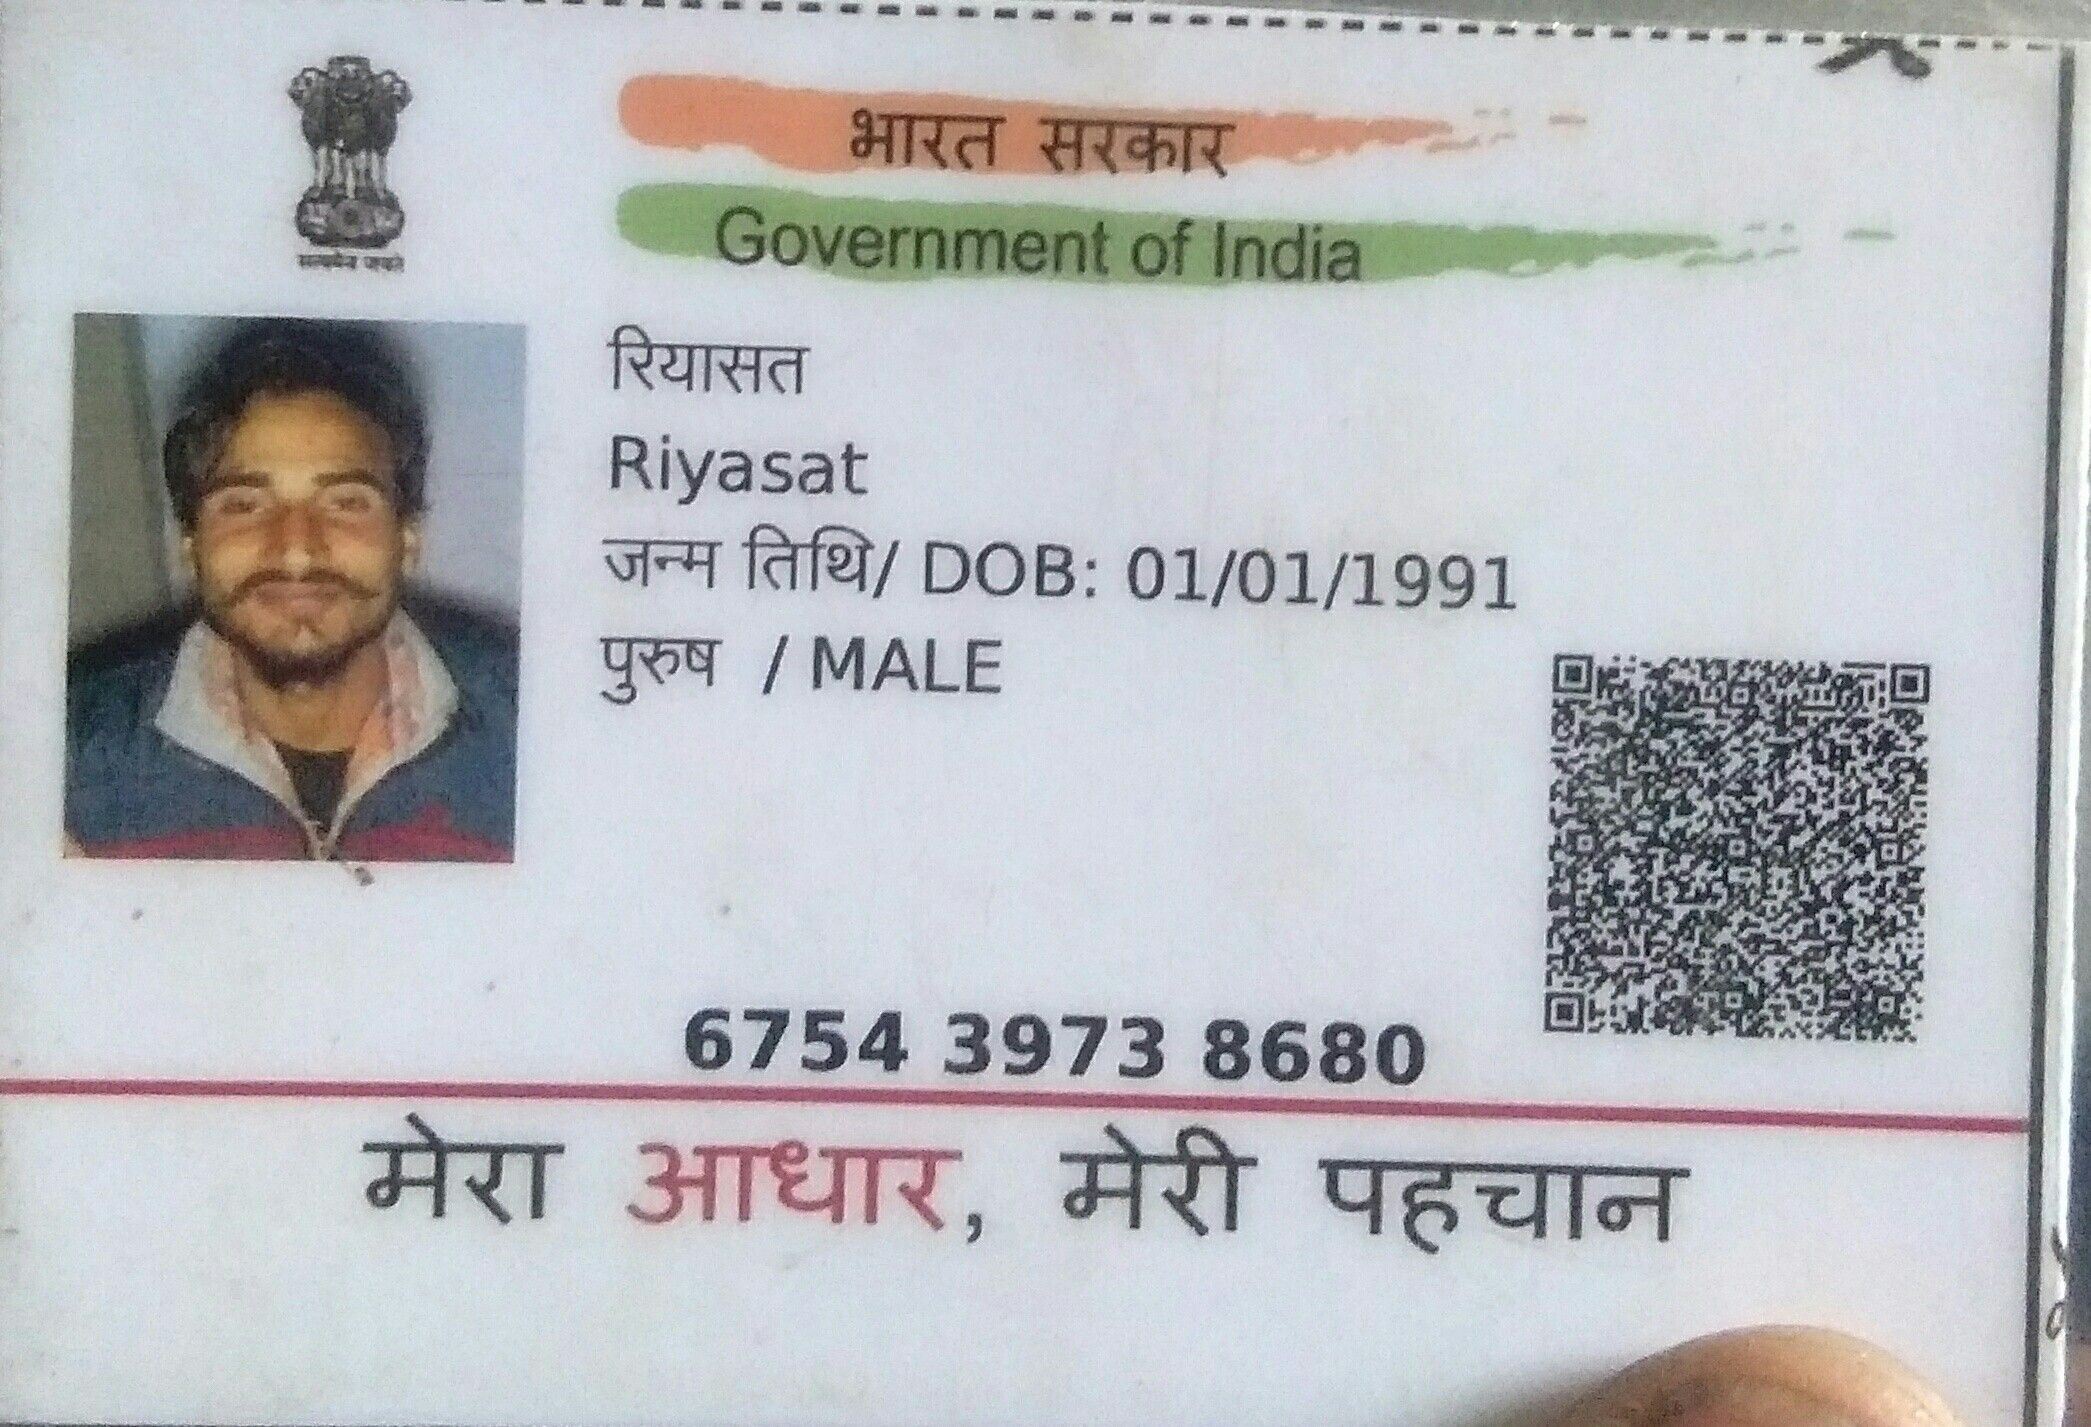

In [3]:
from IPython.display import Image
Image(filename='C:\\Users\\varun\\project_folder\\Aadhar_data\\Front\\10.jpg')
